<a href="https://colab.research.google.com/github/RashmiChrystal/FYP/blob/main/ARIMA_BigDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import glob
import math
from skimage.filters import roberts, sobel, scharr, prewitt
from scipy import ndimage as nd
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops
import io
from math import sqrt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = pd.read_csv('/content/drive/MyDrive/UOM/FYP/Full_BigDataset_PCAFeatures.csv')
print(file)

      Unnamed: 0  principal component 1  principal component 2
0              0              -5.598156               6.744860
1              1              -5.598038               6.744552
2              2              -5.597920               6.744243
3              3              -5.597802               6.743935
4              4              -5.597684               6.743627
...          ...                    ...                    ...
2495        2495              18.005396              -0.006383
2496        2496              18.005514              -0.006691
2497        2497              18.005632              -0.006999
2498        2498              18.005750              -0.007307
2499        2499              18.005868              -0.007615

[2500 rows x 3 columns]


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
PCA1 = file["principal component 1"] 
print(PCA1)

0       -5.598156
1       -5.598038
2       -5.597920
3       -5.597802
4       -5.597684
          ...    
2495    18.005396
2496    18.005514
2497    18.005632
2498    18.005750
2499    18.005868
Name: principal component 1, Length: 2500, dtype: float64


1997 + 503 = 2500 |
1997/2500 = 0.7988 |
79.88%

In [ ]:
size = int(len(PCA1) * 0.7988)
#end = len(PCA1) - 20
train, test = PCA1[0:size], PCA1[size:len(PCA1)]
#train, test = X[0:size], X[size:end]
print(train)
print(test)

0      -5.598156
1      -5.598038
2      -5.597920
3      -5.597802
4      -5.597684
          ...   
1992   -3.510226
1993   -3.510108
1994   -3.509990
1995   -3.509872
1996   -3.509754
Name: principal component 1, Length: 1997, dtype: float64
1997    -0.066323
1998    -0.066205
1999    -0.066087
2000     0.658783
2001     0.658901
          ...    
2495    18.005396
2496    18.005514
2497    18.005632
2498    18.005750
2499    18.005868
Name: principal component 1, Length: 503, dtype: float64


In [ ]:
#PCA1.describe()
train.describe()

count    1997.000000
mean       -4.063213
std         0.301356
min        -5.598156
25%        -4.089286
50%        -4.011538
75%        -3.925381
max        -3.509754
Name: principal component 1, dtype: float64

In [ ]:
print(train.values) #PCA1
X = train.values

[-5.59815615 -5.59803823 -5.59792031 ... -3.50998968 -3.50987177
 -3.50975385]


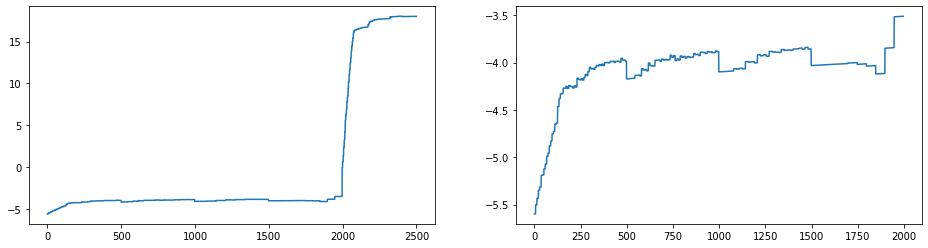

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(PCA1)
ax2.plot(train)

ADF Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train.dropna()) #PCA1
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -5.1204157272198785
p-value: 1.2752642913069564e-05


In [ ]:
pip install pmdarima

In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
number_of_diffs = ndiffs(train, test="adf") #PCA1
#ndiffs(train, test="adf") #PCA1

In [ ]:
print(number_of_diffs)

0


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

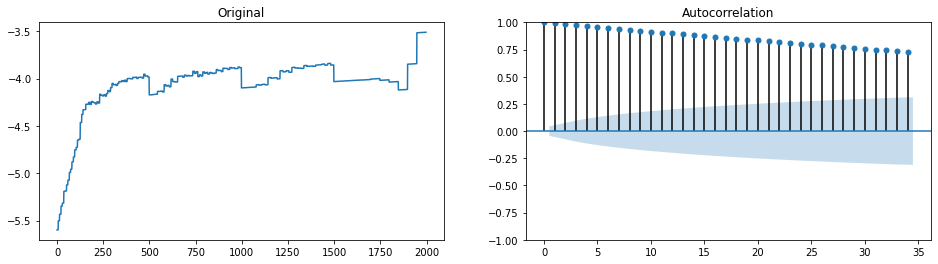

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(train) #PCA1
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(train, ax=ax2); #PCA1

0      -5.598156
1      -5.598038
2      -5.597920
3      -5.597802
4      -5.597684
          ...   
1992   -3.510226
1993   -3.510108
1994   -3.509990
1995   -3.509872
1996   -3.509754
Name: principal component 1, Length: 1997, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


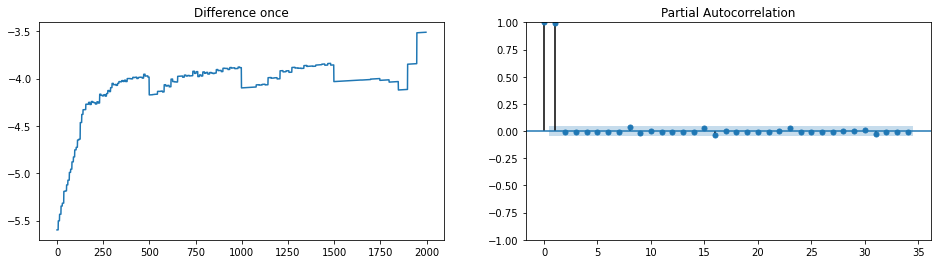

In [ ]:
#diff = train.diff().diff().dropna() #PCA1
diff = []
diff = train
value = 2
print(diff)
for i in range(number_of_diffs):
  diff = diff.diff().dropna() #PCA1
  print(diff)
#diff = train.diff().dropna() #PCA1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

p = 1 since it's the highest above that region

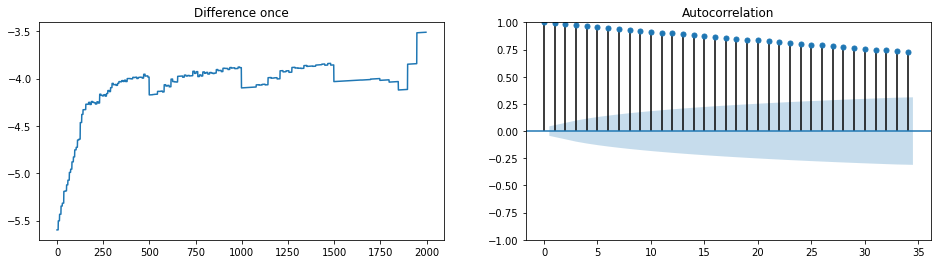

In [ ]:
#diff = train.diff().diff().dropna() #PCA1
#diff = train.diff().dropna() #PCA1
diff = []
diff = train

for i in range(number_of_diffs):
  diff = diff.diff().dropna() #PCA1
  print(diff)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

q = 0

In [ ]:
#pip install statsmodels --upgrade

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# ARIMA Model
model = ARIMA(train, order=(1, number_of_diffs, 0)) #PCA1 #p,d,q order
#model = ARIMA(train) #PCA1 #p,d,q order
result = model.fit()
print(result.summary())
model

                                 SARIMAX Results                                 
Dep. Variable:     principal component 1   No. Observations:                 1997
Model:                    ARIMA(1, 0, 0)   Log Likelihood                5424.457
Date:                   Sun, 27 Mar 2022   AIC                         -10842.914
Time:                           08:40:29   BIC                         -10826.116
Sample:                                0   HQIC                        -10836.746
                                  - 1997                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0632      0.054    -75.286      0.000      -4.169      -3.957
ar.L1          0.9930      0.001   1937.145      0.000       0.992       0.994
sigma2         0.0003   9.27

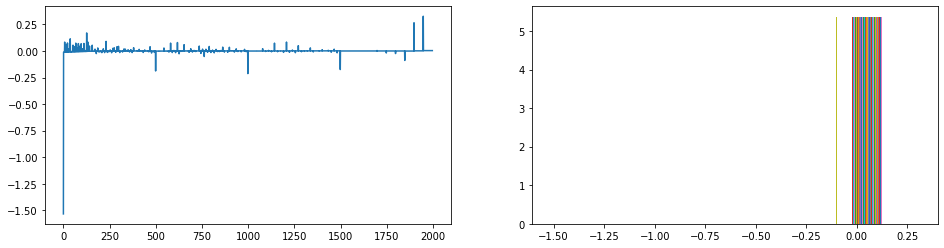

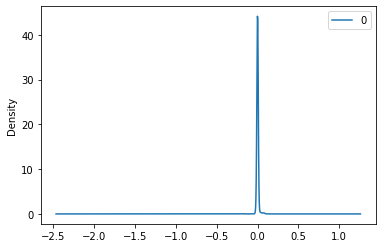

                 0
count  1997.000000
mean      0.000275
std       0.037674
min      -1.534937
25%      -0.000094
50%       0.000482
75%       0.001159
max       0.327701


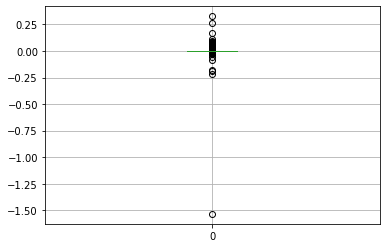

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
#print(residuals)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals[number_of_diffs:])
ax2.hist(residuals[number_of_diffs:], density=True)

# density plot of residuals
residuals[number_of_diffs:].plot(kind='kde')
plt.show()

residuals[number_of_diffs:].plot.box(grid='True')
# summary stats of residuals
print(residuals[number_of_diffs:].describe())

(array([[5.3687278, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 5.3687278,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 5.3687278,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 5.3687278,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 5.3687278,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 5.3687278,
         0.       ]]),
 array([-1.53493731, -1.34867344, -1.16240957, -0.97614571, -0.78988184,
        -0.60361797, -0.41735411, -0.23109024, -0.04482637,  0.1414375 ,
         0.32770136]),
 <a list of 1997 Lists of Patches objects>)

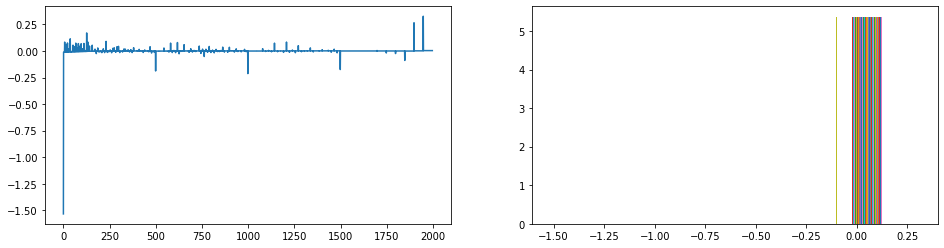

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

In [ ]:
import matplotlib.pyplot as plt

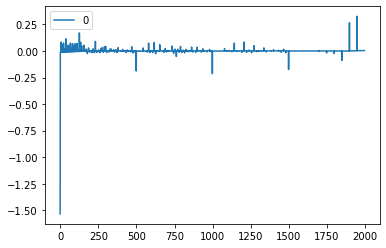

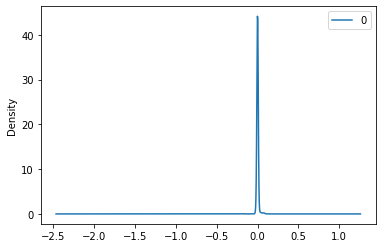

                 0
count  1997.000000
mean      0.000275
std       0.037674
min      -1.534937
25%      -0.000094
50%       0.000482
75%       0.001159
max       0.327701


In [ ]:
residuals = pd.DataFrame(result.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

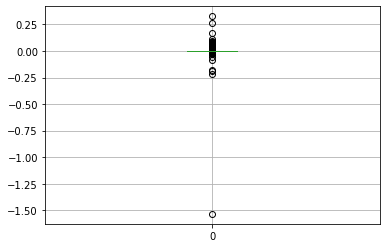

In [ ]:
#fig = plt.figure(figsize =(10, 7))
residuals.plot.box(grid='True')
#plt.show()

In [ ]:
min = -0.002238 - 1.5 * (-0.002238-(-0.000398))
max = -0.000398 + 1.5 * (-0.002238-(-0.000398))
print(min)
print(max)

0.0005220000000000003
-0.003158


In [ ]:
from statsmodels.tsa.stattools import acf

In [ ]:
test_length = len(PCA1) - size
print(test_length)

503


In [ ]:
# Forecast
#fc, se, conf = result.forecast(15, alpha=0.05) # 95% conf
forecast = result.forecast(test_length, alpha=0.05) # 95% conf
print(forecast)

1997   -3.513632
1998   -3.517482
1999   -3.521306
2000   -3.525103
2001   -3.528873
          ...   
2495   -4.046647
2496   -4.046763
2497   -4.046879
2498   -4.046993
2499   -4.047107
Name: predicted_mean, Length: 503, dtype: float64


In [ ]:
# Make as pandas series
fc_series = pd.Series(forecast, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)


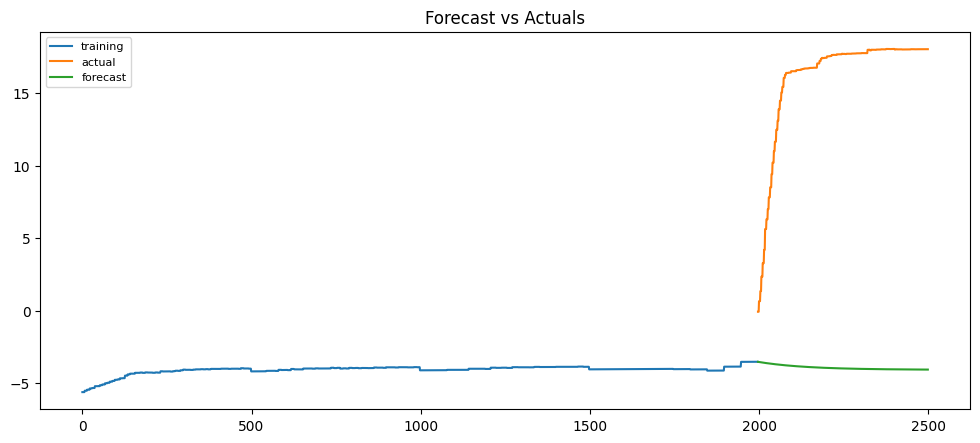

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series,
 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
print(fc_series)

1997   -3.513632
1998   -3.517482
1999   -3.521306
2000   -3.525103
2001   -3.528873
          ...   
2495   -4.046647
2496   -4.046763
2497   -4.046879
2498   -4.046993
2499   -4.047107
Name: predicted_mean, Length: 503, dtype: float64


In [ ]:
y_hat_values = []
anomalies = []
i = size
print(i)
for value in fc_series:
  #print("test val: ", test[i], " - forecasted value: ", value)
  y_hat = test[i] - value
  y_hat_values.append(y_hat)
  if (y_hat<min or y_hat>max):
    anomalies.append(i)
  i = i + 1

print(y_hat_values)
print(anomalies)

#-0.017683
#0.191975

1997
[3.447308955203031, 3.4512775159318494, 3.455219097379308, 4.183885777066003, 4.187773965711804, 4.191635738197757, 4.195471279606883, 4.893863293640934, 4.897646922967466, 4.901404868721884, 5.900468107674116, 5.904175224874077, 5.907857194578916, 5.911514192982835, 6.840309331492569, 6.843916910947959, 6.847500040312636, 6.851058890894493, 7.775917994360255, 7.779428796507526, 7.782915826627687, 9.214367209078082, 9.217807193648309, 9.221223902369944, 9.224617498323632, 9.89653827444006, 9.89988612953734, 9.90321135428489, 9.906514107240714, 10.61420574997159, 10.61746403058204, 10.620700308440288, 11.43315028545613, 11.436343019212202, 11.439514209465631, 11.442664007159502, 12.133586644128773, 12.136694105309878, 12.139780620444823, 12.142846336290646, 13.050418861377166, 13.053443414810099, 13.05644760308434, 13.850100041042198, 13.85306392606062, 13.856007870989458, 13.858932015537587, 14.65848912844529, 14.66137408745005, 14.664239659354948, 15.314155713619153, 15.316982917